### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

d:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("online_retail_II.csv", parse_dates=['InvoiceDate'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Section 1

### Create New Feature: Year

In [3]:
invoice_date = df['InvoiceDate'].dt

df["Year"] = invoice_date.year

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Filtering Data

In [5]:
df_filtered = df[(df["Quantity"] > 0) & (~df["Invoice"].str.contains("C"))]

In [6]:
df.shape

(1067371, 9)

In [7]:
df_filtered.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


### Create New Feature: Revenue

In [8]:
df["Revenue"] = df["Price"] * df["Quantity"]

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Average of Revenue per Year

<AxesSubplot:xlabel='Year'>

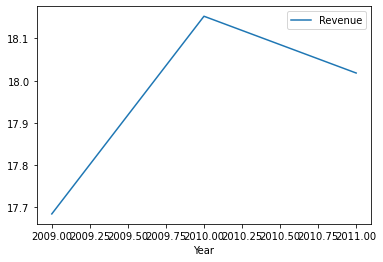

In [9]:
df.groupby("Year").agg({"Revenue": "mean"}).plot()

In [10]:
df.groupby("Year").agg({"Revenue": "mean"})

,Revenue
Year,
2009,17.684777
2010,18.152555
2011,18.018195


### Interpretation

pada tahun 2009, rata-rata revenue  sekitar 17.68. Kemudian pada tahun 2010 ada kenaikan sekitar 2% yaitu diangka 18.15. pada tahun 2011 terdapat penurun sekitar 0.7% sehingga revenue pada tahun 2011 ada di angka 18.01

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [11]:
df_filtered.isna().sum()

Invoice             0
StockCode           0
Description      1693
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238800
Country             0
Year                0
dtype: int64

In [12]:
df_filtered["Customer ID"] = ~df_filtered["Customer ID"].isna()

C:\Users\Jayy\AppData\Local\Temp\ipykernel_11164\3046668048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Customer ID"] = ~df_filtered["Customer ID"].isna()


In [13]:
df_finished = df_filtered.copy()

In [14]:
df_finished.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,True,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,True,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,True,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,True,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,True,United Kingdom,2009


#### Customers who canceled their purchases

In [15]:
df_cenceled = df[(df["Invoice"].str.contains("C"))]
df_cenceled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,-35.4


### Number of Finished and Canceled Transactions Each Year

In [54]:
df_finished["Year"].value_counts().sort_values()

2009     44123
2011    489603
2010    510694
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

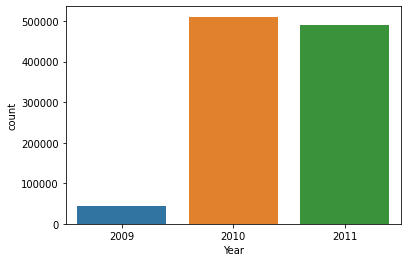

In [41]:

sns.countplot(x="Year", data=df_finished)

In [55]:
df_cenceled["Year"].value_counts().sort_values()

2009    1015
2011    8560
2010    9919
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

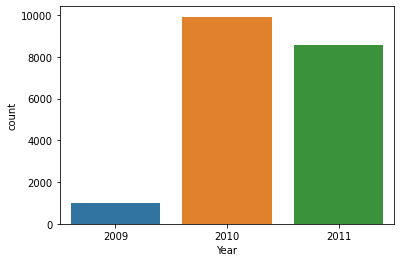

In [45]:
sns.countplot(x="Year", data=df_cenceled)

### Cancellation Rate

In [53]:
nine = (df_cenceled[df_cenceled["Year"] == 2009].shape[0] / df[df["Year"] == 2009].shape[0])*100
ten = (df_cenceled[df_cenceled["Year"] == 2010].shape[0] / df[df["Year"] == 2010].shape[0])*100
eleven = (df_cenceled[df_cenceled["Year"] == 2011].shape[0] / df[df["Year"] == 2011].shape[0])*100

print(nine, ten, eleven)

2.2441850181303615 1.8975960085247383 1.7139573392814595


### Interpretation

tingkat pembatalan mengalami penurunan tiap tahunnya dari yang pada tahun 2009 ada diangka 2.2 persen, pada tahun 2010 ada diangka 1.89 persen dan pada tahun 1.71 persen